In [1]:
# make global imports
import copy
from vpanalysis import bees, bees_extended, Custom, Data, enhance_data, get_data, get_step1_data, Option, Options, BeesPlots, PlotsData
import os
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

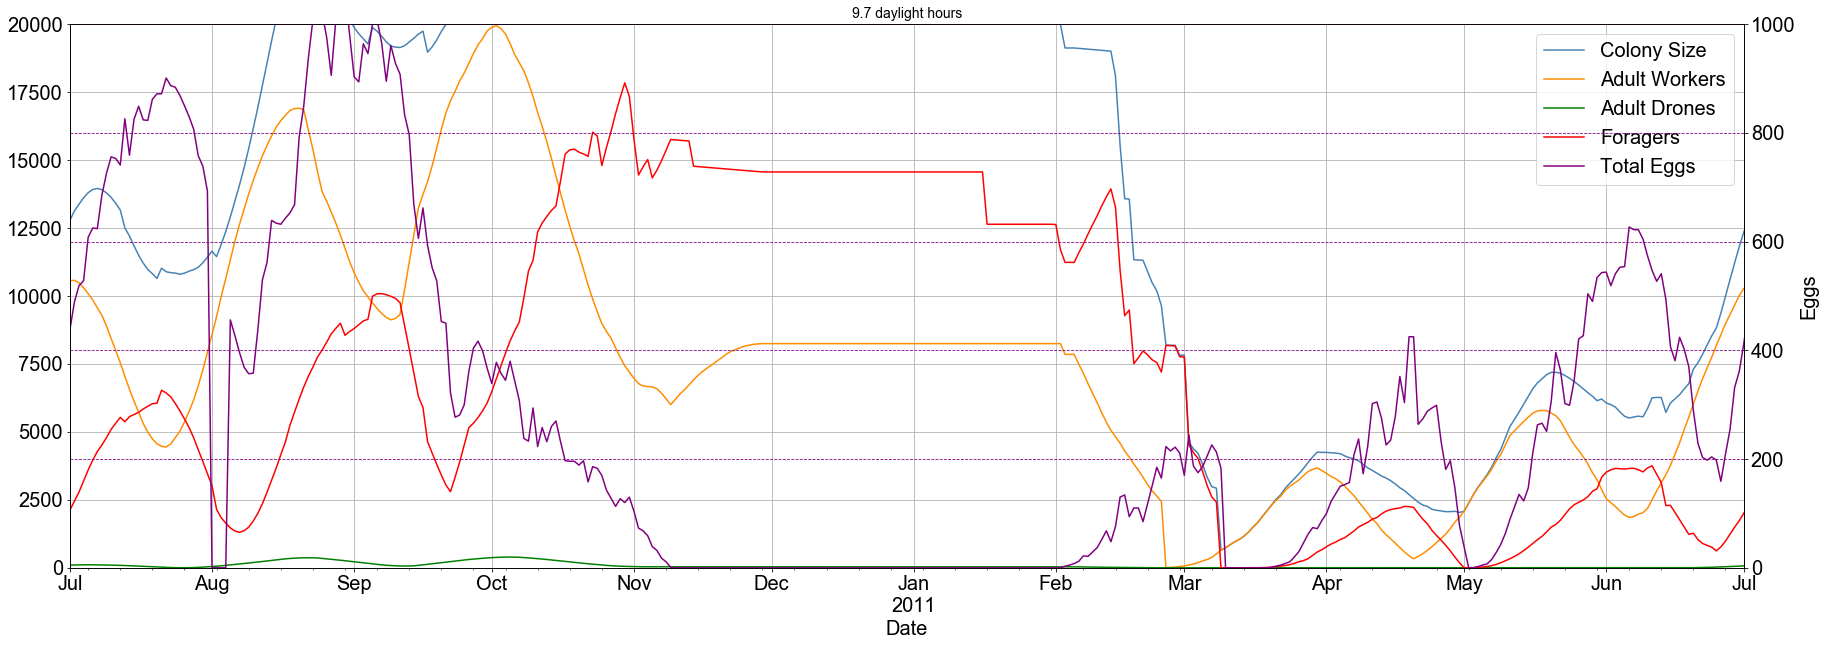

In [10]:
simulations_output_directory = 'results-20200723092651'
simulation_file = 'walla-walla/rcp85-data_46.03125_-118.34375/ForagersAgingAdultAgingWhenEggLaid_InOut.txt'
data = Data(simulations_output_directory, simulation_file, '9.7 daylight hours')

options = Options()
options.data = data
options.columns = bees
options.figsize = Option(
    activated = True,
    params = (30, 10)
)
options.x_limit = Option(
    activated = True,
    #params = ['2070-01-01', '2072-01-01'],
    #params = ['2070-02-01', '2070-06-01']
    params = ['2010-07-01', '2011-07-01']
)
options.y_limit = Option(
    activated = True,
    params = [0, 20000]
)
options.eggs = Option(
    activated = True,
    params = Custom(
        limit = [0, 1000],
        grid = True
    )
)

plot = BeesPlots.make_plot(options)
#plot.plot.xaxis.set_minor_locator(mdates.MonthLocator())
#plot.plot.xaxis.grid(True, which='both')
plot.add_grid()

(0, 4000)

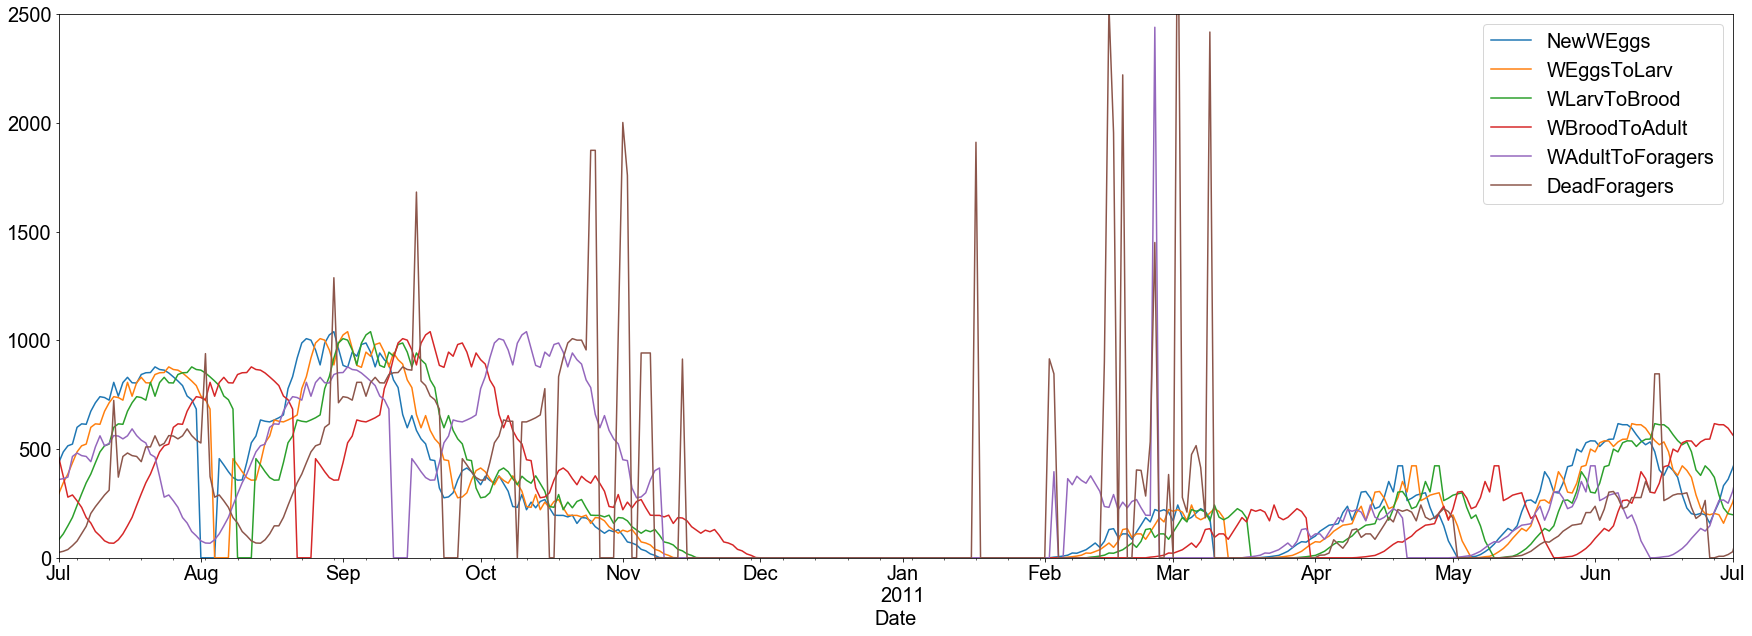

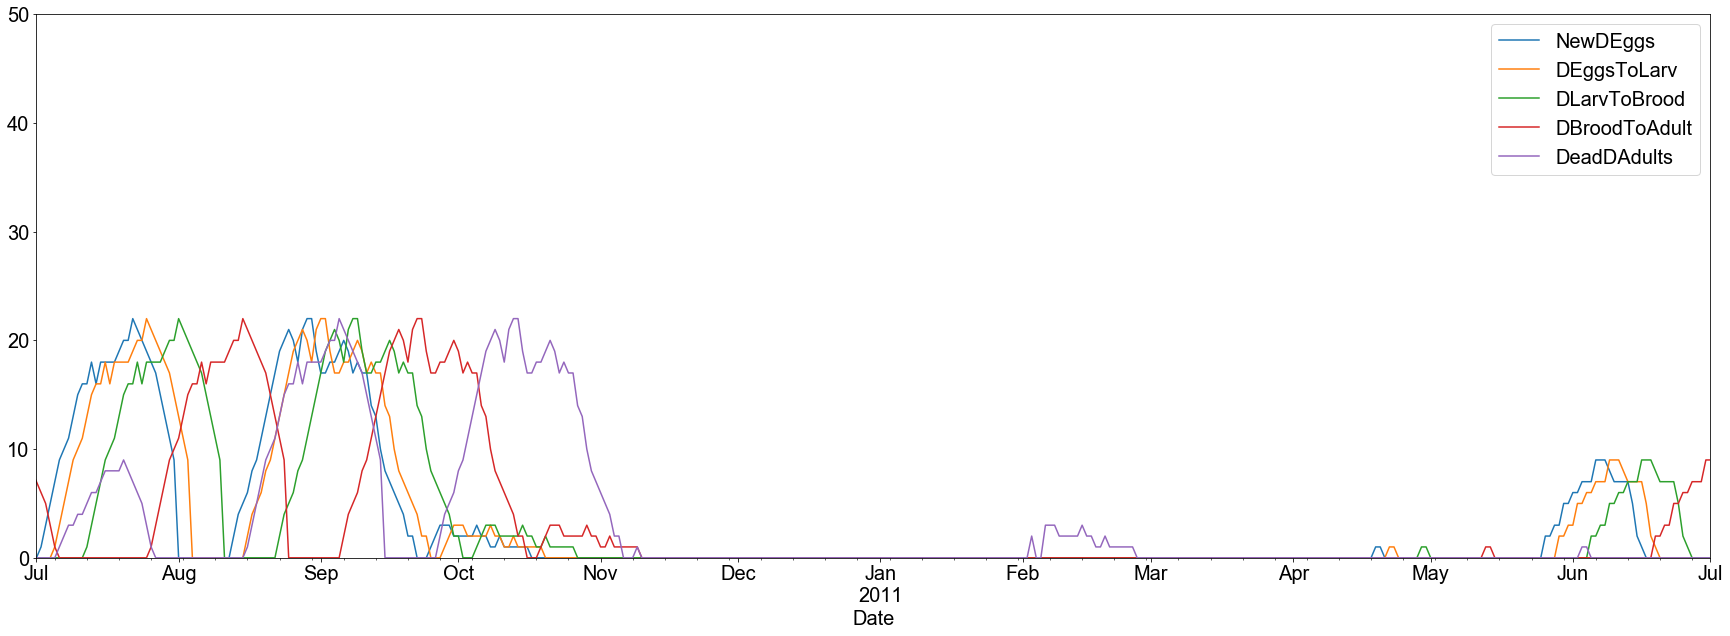

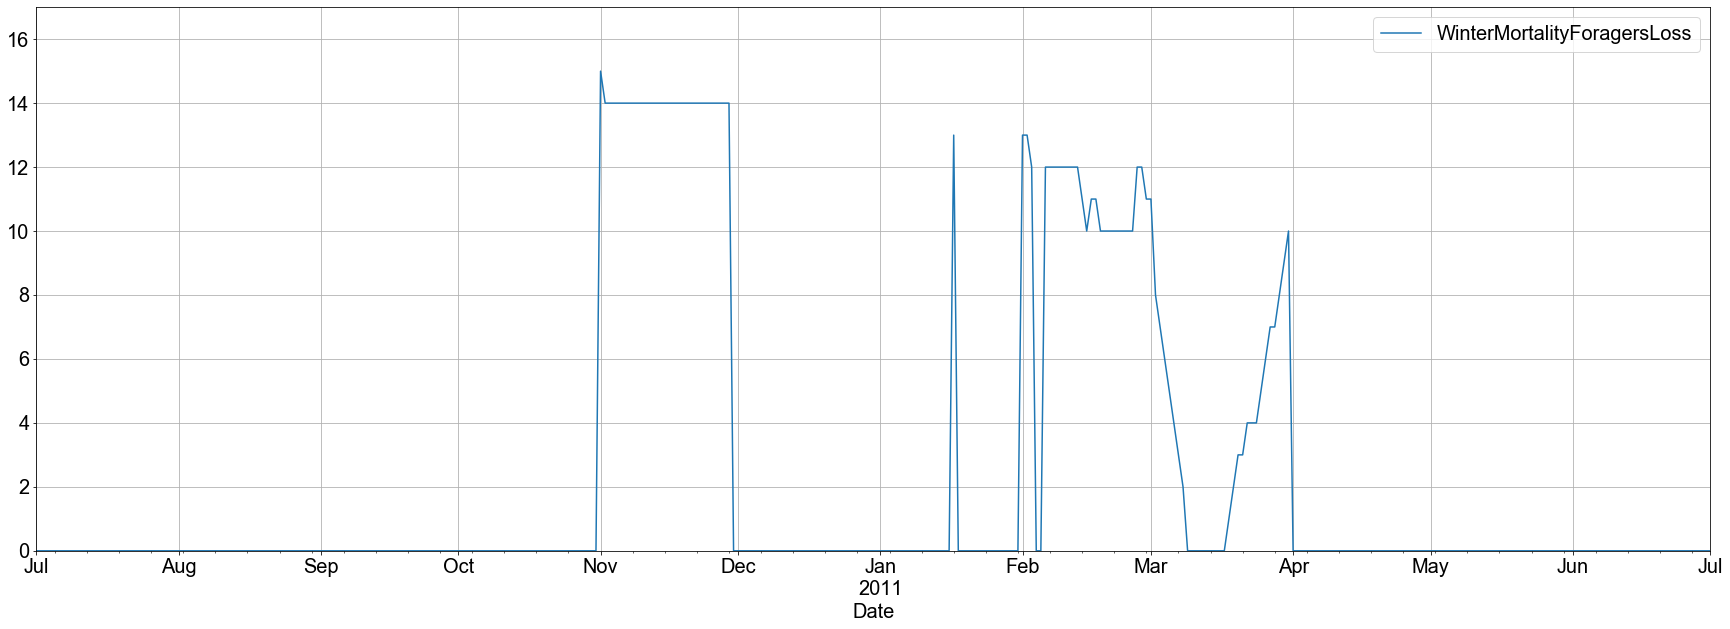

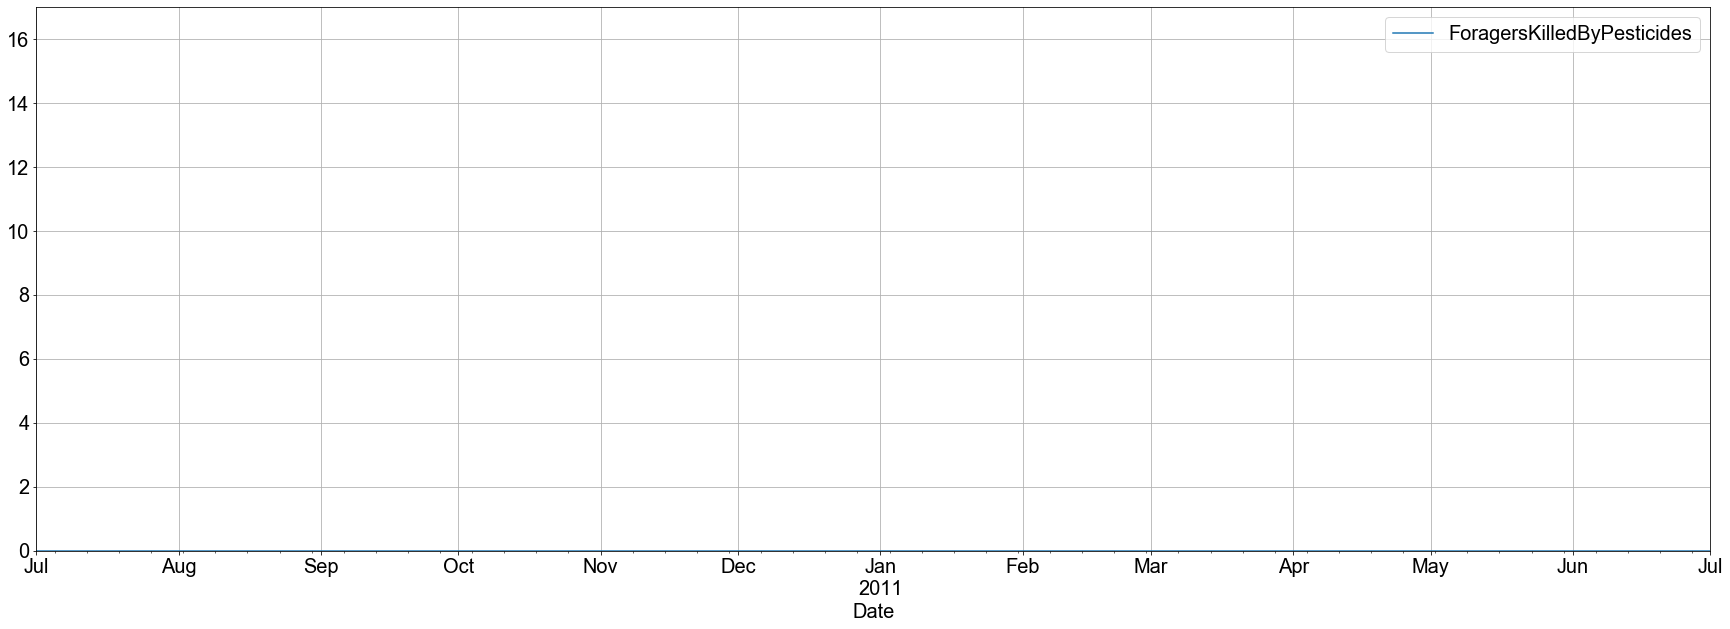

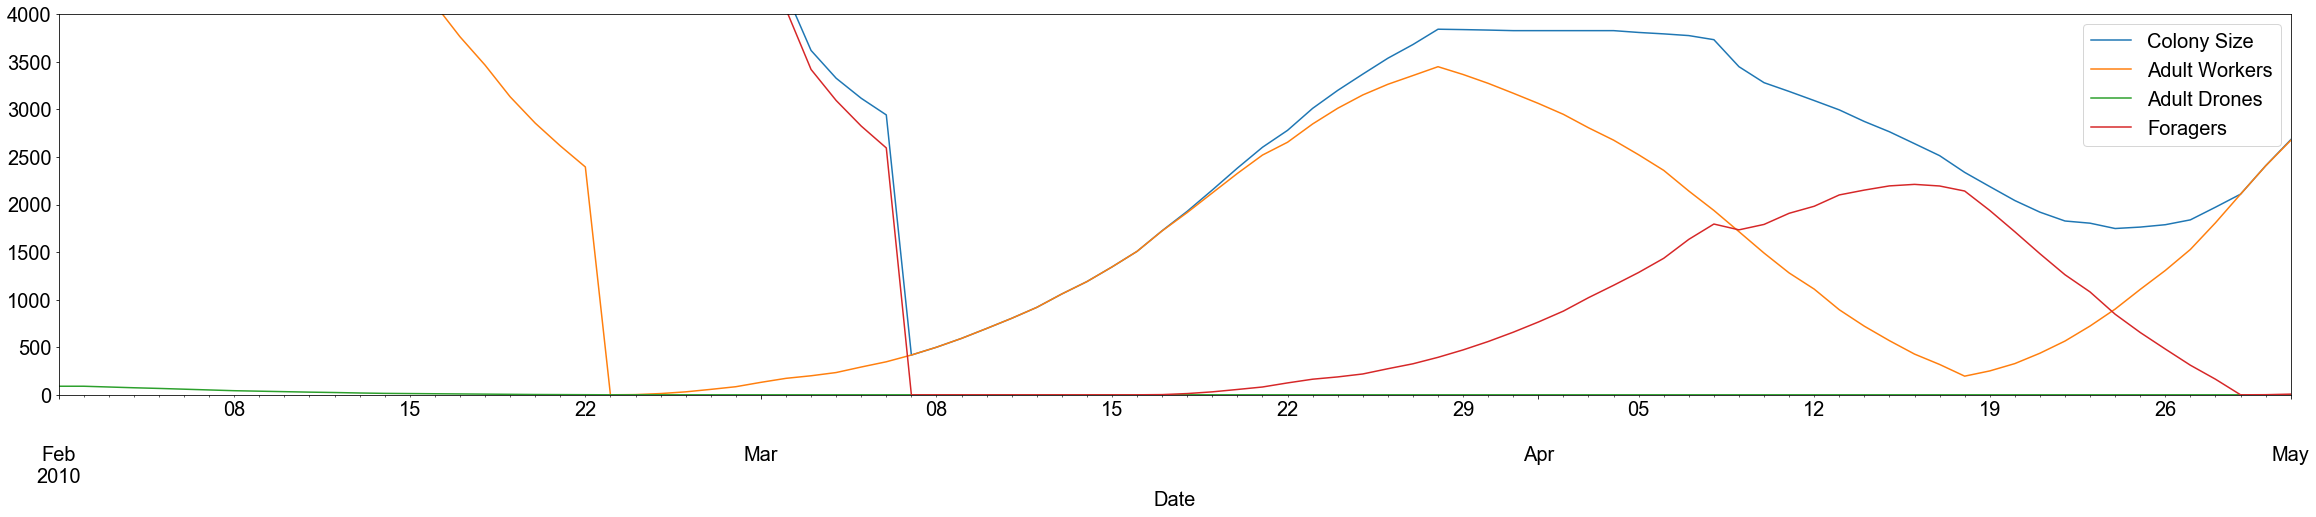

In [28]:
column_names = ["Date", "Colony Size", "Adult Drones", "Adult Workers", "Foragers", "Active Foragers",
                "Capped Drone Brood", "Capped Worker Brood",
                "Drone Larvae", "Worker Larvae", "Drone Eggs", "Worker Eggs", "Total Eggs", "DD", "L", "N", "P", "dd",
                "l", "n", "Free Mites", "Drone Brood Mites",
                "Worker Brood Mites", "Mites/Drone Cell", "Mites/Worker Cell", "Mites Dying", "Proportion Mites Dying",
                "Colony Pollen (g)", "Pollen Pesticide Concentration", "Colony Nectar",
                "Nectar Pesticide Concentration",
                "Dead Drone Larvae", "Dead Worker Larvae", "Dead Drone Adults", "Dead Worker Adults", "Dead Foragers",
                "Queen Strength", "Average Temperature (celsius)", "Rain", "Min Temp", "Max Temp", "Daylight hours",
                "Forage Inc", "Forage Day",
                "NewWEggs", "NewDEggs", "WEggsToLarv", "DEggsToLarv", "WLarvToBrood", "DLarvToBrood", "WBroodToAdult", "DBroodToAdult", "DeadDAdults", "ForagersKilledByPesticides", "WAdultToForagers", "WinterMortalityForagersLoss", "DeadForagers"]

simulations_output_directory = 'results-20200723101050'
simulation_file = 'walla-walla/rcp85-data_46.03125_-118.34375/ForagersAgingAdultAgingWhenEggLaid_InOut.txt'
simulation_output = os.path.join(simulations_output_directory, simulation_file)

import pandas as pd

data = pd.read_table(simulation_output, delim_whitespace=True, header=None, names=column_names, skiprows=6)
data = enhance_data(data)

plot = data.plot(x='Date', y=["NewWEggs", "WEggsToLarv", "WLarvToBrood", "WBroodToAdult", "WAdultToForagers", "DeadForagers"], figsize=(30, 10))
plot.set_xlim('2010-07-01', '2011-07-01')
plot.set_ylim(0, 2500)

plot = data.plot(x='Date', y=["NewDEggs", "DEggsToLarv", "DLarvToBrood", "DBroodToAdult", "DeadDAdults"], figsize=(30, 10))
plot.set_xlim('2010-07-01', '2011-07-01')
plot.set_ylim(0, 50)

plot = data.plot(x='Date', y="WinterMortalityForagersLoss", figsize=(30, 10))
plot.set_xlim('2010-07-01', '2011-07-01')
plot.set_ylim(0, 17)
plot.grid(True)

plot = data.plot(x='Date', y="ForagersKilledByPesticides", figsize=(30, 10))
plot.set_xlim('2010-07-01', '2011-07-01')
plot.set_ylim(0, 17)
plot.grid(True)

plot = data.plot(x='Date', y=bees['columns'], figsize=(40, 7))
plot.set_xlim('2010-02-01', '2010-05-01')
plot.set_ylim(0, 4000)